## Задача №1
Построение графиков ХВ от имеющейся ОФП.  
Имеется некая зависимость ОФП (можешь составить сама и отобразить на графике).  
Необходимо из этой зависимости получить ХВ по Corey и отобразить на графиках:
- Обводненность от водонасыщенности;  
- Обводненность от КИНа.  

Данную задачу можешь сделать в коде и показать на графиках.  

## ОФП модель Corey:
$$
  k_{rw}(S) = k_{rw}(S_{or}) \left( \frac{S_w - S_{wc}}{1 - S_{wc} - S_{or}} \right)^{a_w}
$$

$$
  k_{ro}(S) = k_{ro}(S_{wc}) \left( \frac{1 - S_{or} - S_w}{1 - S_{wc} - S_{or}} \right)^{a_o}
$$

где:  

$k_{rw}(S_{or})$ - ОФП воды при остаточной нефтенасыщенности  
$k_{ro}(S_{wc})$ - ОФП нефти при связанной водонасыщенности  
$S_{or}$ - остаточная нефтенасыщенность  
$S_{wc}$ - связанная (начальная) водонасыщенность  
$a_w$ - показатель степени для воды  
$a_o$ - показатель степени для нефти

## Функция Баклея-Леверетта (содержание воды в потоке):  
$$
  F(S) = \frac{k_{rw}(S_{w})}{k_{rw}(S_{w}) + \mu_{0}*k_{ro}(S_{w})} = \frac{1}{1 + \mu_{0} \frac{k_{ro}}{k_{rw}}}
$$

где:  

$\mu_{0}$ - отношение вязкости воды к вязкости нефти

## Отбор от НИЗ (oil uptake of the initial recoverable reserves - uptake_IRR):
$$
 \frac{S_w - S_{wc}}{1 - S_{wc} - S_{or}}
$$ 
  



Следовательно, функцию Баклея-Леверетта можно переписать в виде:
$$
  F(S) = \frac{1}{1 + \mu_{0} \frac{(1 - \text{отбор_от_НИЗ})^{a_o}}{\text{(отбор_от_НИЗ)}^{a_w}}}
$$

## Проектный КИН:
$$
 \frac{1 - S_{wc} - S_{or}}{1 - S_{wc}}
$$

## Текущий КИН от отбора от НИЗ:  

***<center>Текущий КИН = отбор от НИЗ * проектный КИН</center>***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#parameters
muw = 0.37 # вязкость воды
muo = 0.61 # вязкость нефти
kro0 = 0.65 # ОФП нефти при связанной водонасыщенности
krw0 = 0.68 # ОФП воды при остаточной нефтенасыщенности
sor = 0.284
swc = 0.43
alpha_o = 3.0
alpha_w = 2.5
mu = muw/muo
step = 0.001
points = 100

In [3]:
def krw(sw):
    return krw0 * ((sw - swc) / (1 - swc - sor))**alpha_w

In [4]:
def kro(sw):
    return kro0 * ((1 - sw - sor) / (1 - swc - sor))**alpha_o

In [5]:
def fw(sw):
    return ((krw(sw) / muw)/(krw(sw) / muw + kro(sw) / muo))

In [6]:
def fw(sw):
    return krw(sw) / (krw(sw) + mu * kro(sw))

In [7]:
def fw_from_uptake_IRR(uptake_IRR):
    return 1/(1 + (kro0 * muw * (1-uptake_IRR)**alpha_o)/(krw0 *muo * (uptake_IRR)**alpha_w))

In [8]:
def fw_from_rf(rf):
    return 1/(1 + (kro0 * muw * (1-rf/rf_max)**alpha_o)/(krw0 *muo * (rf/rf_max)**alpha_w))

In [9]:
##sw_all = np.arange(swc, 1-sor+step, step)

In [10]:
sw_all = np.linspace(swc, 1-sor, points)

In [11]:
uptake_IRR_all = np.linspace(0, 1, points)

In [12]:
# Проектный КИН
rf_max = (1 - swc - sor) / (1 - swc)

In [13]:
f'Проектный КИН = {round(rf_max, 3)}'

'Проектный КИН = 0.502'

In [14]:
rf_all = np.linspace(0, rf_max, points)

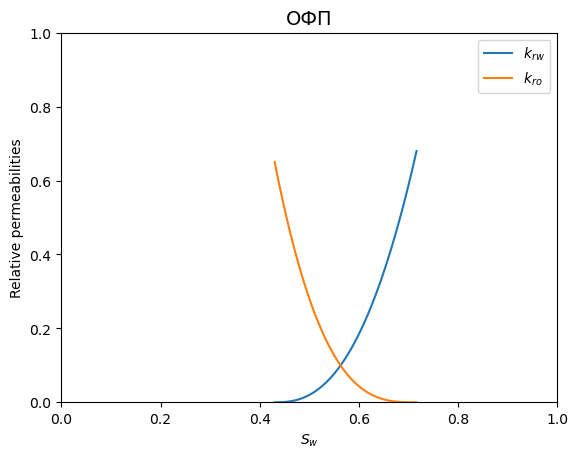

In [15]:
#plot ОФП
fig,ax=plt.subplots()
ax.plot(sw_all, krw(sw_all),label='$k_{rw}$') 
ax.plot(sw_all, kro(sw_all),label='$k_{ro}$') 
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel(r"$S_w$") 
ax.set_ylabel("Relative permeabilities") 
ax.legend()
plt.title('ОФП', fontsize=14);

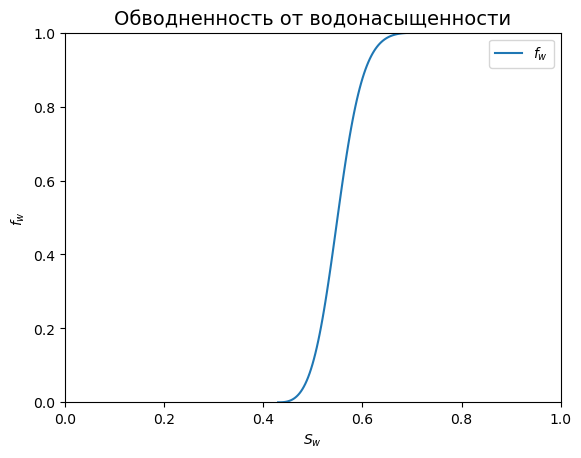

In [16]:
#plot Fw from S
fig1,ax1=plt.subplots()
ax1.plot(sw_all, fw(sw_all),label=r'$f_w$')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_xlabel(r"$S_w$") 
ax1.set_ylabel(r"$f_w$")
ax1.legend()
plt.title('Обводненность от водонасыщенности', fontsize=14);

C:\Users\Alina\AppData\Local\Temp\ipykernel_18716\3377792597.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(1 + (kro0 * muw * (1-uptake_IRR)**alpha_o)/(krw0 *muo * (uptake_IRR)**alpha_w))


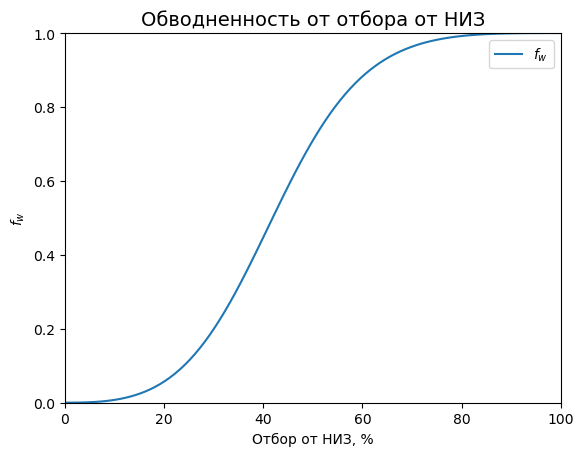

In [17]:
#plot Fw from uptake_IRR
fig2,ax2=plt.subplots()
ax2.plot(uptake_IRR_all*100, fw_from_uptake_IRR(uptake_IRR_all),label=r'$f_w$')
ax2.set_xlim(0,100)
ax2.set_ylim(0,1)
ax2.set_xlabel(r"Отбор от НИЗ, %") 
ax2.set_ylabel(r"$f_w$")
ax2.legend()
plt.title('Обводненность от отбора от НИЗ', fontsize=14);

C:\Users\Alina\AppData\Local\Temp\ipykernel_18716\3854762216.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(1 + (kro0 * muw * (1-rf/rf_max)**alpha_o)/(krw0 *muo * (rf/rf_max)**alpha_w))


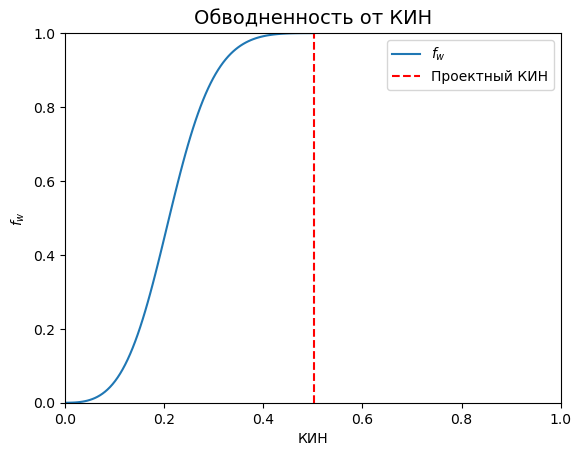

In [18]:
#plot Fw from uptake_IRR
fig3,ax3=plt.subplots()
ax3.plot(rf_all, fw_from_rf(rf_all),label=r'$f_w$')
ax3.plot([rf_max, rf_max], [0, 1] ,label=r'Проектный КИН', color='red', linestyle='dashed')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax3.set_xlabel(r"КИН") 
ax3.set_ylabel(r"$f_w$")
ax3.legend()
plt.title('Обводненность от КИН', fontsize=14);

In [19]:
data = pd.DataFrame()

In [20]:
data['Водонасыщенность'] = sw_all
data['ОФП вода'] = krw(sw_all)
data['ОФП нефть'] = kro(sw_all).round(6)
data['Обводненность, %'] = (fw(sw_all)*100).round(4)
data['Отбор от НИЗ, %'] = (uptake_IRR_all*100).round(1)
data['КИН'] = (rf_all).round(3)

In [21]:
data

,Водонасыщенность,ОФП вода,ОФП нефть,"Обводненность, %","Отбор от НИЗ, %",КИН
0,0.430000,0.000000,0.650000,0.0000,0.0,0.000
1,0.432889,0.000007,0.630501,0.0018,1.0,0.005
2,0.435778,0.000039,0.611397,0.0106,2.0,0.010
3,0.438667,0.000109,0.592682,0.0302,3.0,0.015
4,0.441556,0.000223,0.574353,0.0640,4.0,0.020
...,...,...,...,...,...,...
95,0.704444,0.613380,0.000043,99.9958,96.0,0.481
96,0.707333,0.629650,0.000018,99.9983,97.0,0.487
97,0.710222,0.646175,0.000005,99.9995,98.0,0.492
98,0.713111,0.662958,0.000001,99.9999,99.0,0.497
